# COMP 3610 – A3

- Zidane Timothy, Maia Neptune, Christophe Gittens

In [6]:
from pathlib import Path
import os
import tarfile
import pandas as pd
import shutil
import glob

import time, matplotlib.pyplot as plt, seaborn as sns, matplotlib.ticker as ticker
import numpy as np


from datasets import load_dataset, load_from_disk
from pathlib import Path
import pyarrow as pa
import pyarrow.parquet as pq
from datetime import datetime
import json

Load clean and merge respective partioned categories

In [ ]:
# Load all cleaned pkl files
def load_all_data(pkl_directory):
    all_dfs = []

    for file in os.listdir(pkl_directory):
        if file.endswith(".pkl.bz2"):
            file_path = os.path.join(pkl_directory, file)
            df = pd.read_pickle(file_path, compression="bz2")
            df.to_parquet()
            all_dfs.append(df)

    # Combine into a single DataFrame for EDA
    full_df = pd.concat(all_dfs, ignore_index=True)
    print("Combined dataframe shape:", full_df.shape)

    return full_df.copy()

In [14]:
start_path = r"D:\UWI\Year 3\Sem 2\COMP3610-Big-Data\Assignments\Assignment#3\A3\datasets\output_folder\cleaned"

all_pkls = load_all_data(start_path)

Combined dataframe shape: (6038828, 28)


## Star Rating Histogram

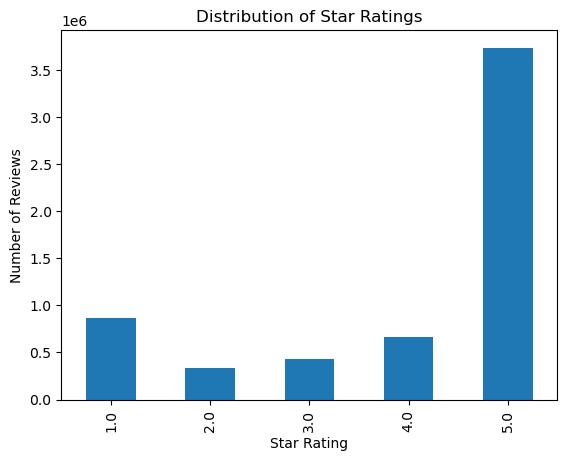

In [15]:
import matplotlib.pyplot as plt

all_pkls["rating"].value_counts().sort_index().plot(kind="bar")
plt.xlabel("Star Rating")
plt.ylabel("Number of Reviews")
plt.title("Distribution of Star Ratings")
plt.show()


## Top 10 Categories

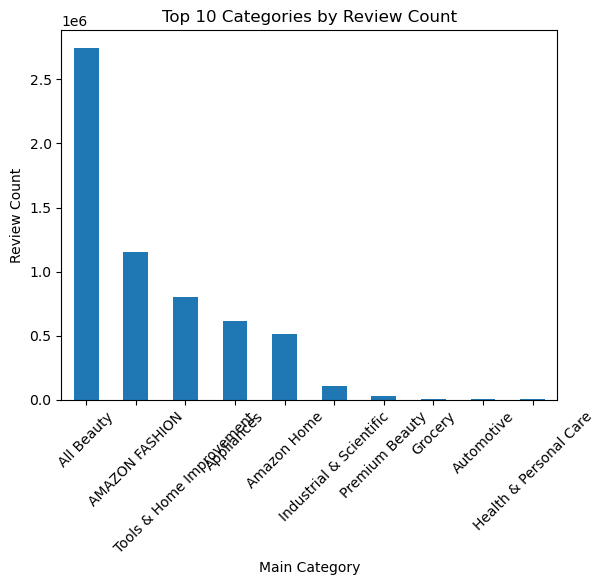

In [17]:
all_pkls["main_category"].value_counts().head(10).plot(kind="bar")
plt.xlabel("Main Category")
plt.ylabel("Review Count")
plt.title("Top 10 Categories by Review Count")
plt.xticks(rotation=45)
plt.show()


## Top 10 Brands

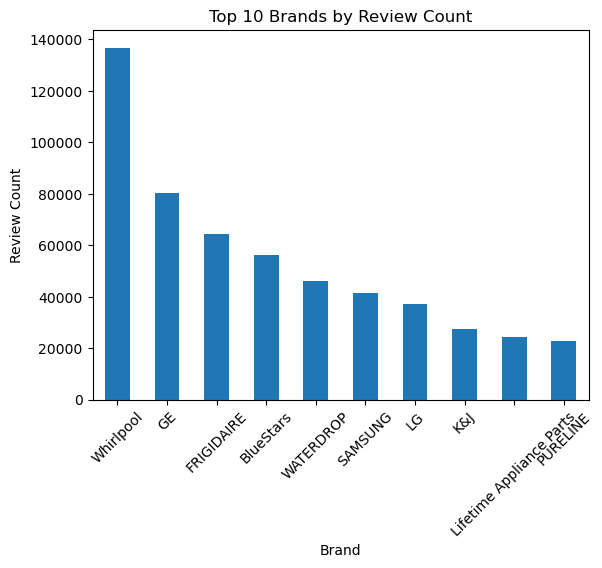

In [18]:
top_brands = all_pkls[all_pkls["brand"] != "Unknown"]
top_brands["brand"].value_counts().head(10).plot(kind="bar")
plt.xlabel("Brand")
plt.ylabel("Review Count")
plt.title("Top 10 Brands by Review Count")
plt.xticks(rotation=45)
plt.show()


## Time-Based Trend

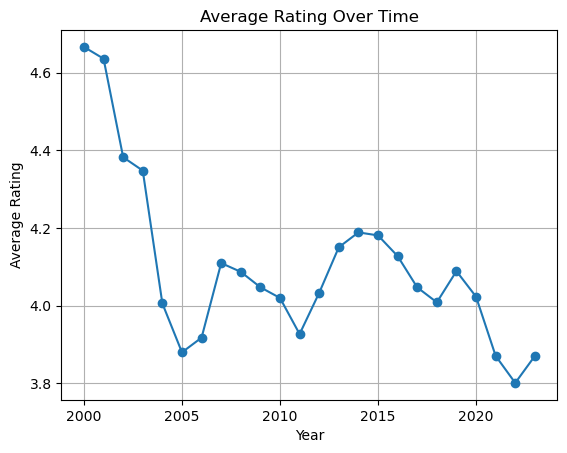

In [19]:
yearly_avg = all_pkls.groupby("year")["rating"].mean()
yearly_avg.plot(kind="line", marker='o')
plt.xlabel("Year")
plt.ylabel("Average Rating")
plt.title("Average Rating Over Time")
plt.grid(True)
plt.show()

## Correlation

In [20]:
corr = all_pkls["review_length"].corr(all_pkls["rating"])
print(f"Pearson correlation between review length and rating: {corr:.4f}")


Pearson correlation between review length and rating: -0.0788
